<a href="https://colab.research.google.com/github/UtujeHortense/thepainter/blob/main/PainterHard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1 : Download images from kaggle datasets

In [ ]:
! pip install -Uq kaggle
from google.colab import files
files.upload()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 KB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hortenseutuje","key":"7a6e349116460a541729b6cee12bff36"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

In [ ]:
!kaggle datasets download -d gianmarcocavallaccio/bestartworksofalltime20

100% 1.07G/1.07G [00:48<00:00, 29.3MB/s]
100% 1.07G/1.07G [00:48<00:00, 23.8MB/s]


In [ ]:
!mkdir trainpainter

In [ ]:
! unzip bestartworksofalltime20.zip -d trainpainter

create another directory with just 2 painters

In [ ]:
!mkdir painters

In [ ]:
! cp -r /content/trainpainter/best-artworks-of-all-time-20/images/images/Vincent_van_Gogh painters

In [ ]:
! cp -r /content/trainpainter/best-artworks-of-all-time-20/images/images/Leonardo_da_Vinci painters

## Step 2 Treat images for training

In [ ]:
!pip install -Uqq fastai

In [ ]:
from fastcore.all import *
from fastai.vision.all import *
path = Path('/content/painters')


failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

len(failed)



0

Create datablock for the learner

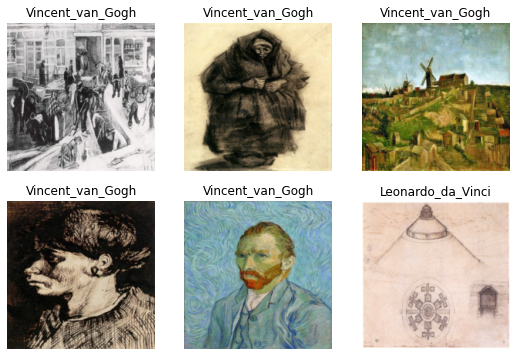

In [ ]:
from torch.utils.data import dataloader
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed =42),
    get_y = parent_label,
    item_tfms=[Resize(192, method='squish')]
    ).dataloaders(path, bs=32)
dls.show_batch(max_n=6)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.021394,0.507978,0.176471,02:26


epoch,train_loss,valid_loss,error_rate,time
0,0.577738,0.397465,0.117647,03:20
1,0.419547,0.301391,0.093137,03:18
2,0.295658,0.233878,0.073529,03:20


In [ ]:
learn.export('painter.pkl')

In [ ]:
!pip install duckduckgo_search

In [ ]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
  print(f"Searching for {term}")
  return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [ ]:
urls = search_images('art by davinci', max_images=1)
urls[0]

Searching for art by davinci


'http://4.bp.blogspot.com/-fAV8-FCPoeU/U16MU-ir_wI/AAAAAAABLww/le3I09ZnoRI/s1600/leonardo-da-vinci-most+famous+paintings@fineartandyou6.jpg'

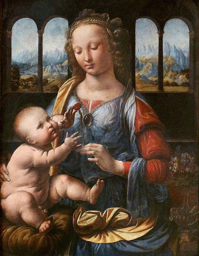

In [ ]:
from fastdownload import download_url
dest = 'mydavinci.jpg'
download_url(urls[0], dest, show_progress=False) # method in fastlib

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

In [ ]:
painter,_,probs = learn.predict('mydavinci.jpg')
print(f"This is :{painter}.")
print(f"Probability is:{probs[0]:4f}")

This is :Leonardo_da_Vinci.
Probability is:0.997988


In [ ]:
categories = ('Leonardo_da_Vinci','Vincent_van_Gogh')
def classify_painter(img):
  painter,_,probs = learn.predict(img)
  return dict(zip(categories, map(float,probs)))

In [ ]:
files.upload()

In [ ]:
learn2 = load_learner('painter.pkl')
classify_painter('mydavinci.jpg')

{'Leonardo_da_Vinci': 0.9979879856109619,
 'Vincent_van_Gogh': 0.0020120381377637386}